# Artist Bigrams

the covariance does not really show us how the artists occur together with each other

# build artist bigrams

In [5]:
import pandas as pd
#df = pd.read_parquet('sources/metadata.parquet', engine='pyarrow')
#df_large = pd.read_parquet('sources/metadata-large.parquet', engine='pyarrow')

exact_matches = pd.read_parquet("../results/artists_exact_match_large.parquet", engine='pyarrow')
assert "artists" in exact_matches.columns, f'artists is not in {exact_matches.columns}'
assert "num_artists" in exact_matches.columns, f'num_artists is not in {exact_matches.columns}'


# read excel_artist_names
import my_utils

excel_artist_names = my_utils.read_lines_as_list("../sources/excel_artists_copy_paste_name.txt")
hundred_artist_names = excel_artist_names[0:100]
ten_artist_names = excel_artist_names[0:10]


artist_mentions = pd.read_parquet('../results/artist_mentions.parquet', engine='pyarrow')

In [20]:
def build_bigram(string1, string2):
    l = [string1, string2]
    l.sort()
    return ", ".join(l)
    
from collections import defaultdict

bigrams = defaultdict(lambda: 0)
print(exact_matches.head())

for index, row in exact_matches.iterrows():
    if len(row.artists) > 1:
        #print(row.artists)
        for i in range(len(row.artists)):
            for j in range(i+1, len(row.artists)):
                bigram = build_bigram(row.artists[i], row.artists[j])
                #print(f'bigram {bigram} from {row.artists[i]} and {row.artists[j]}')
                bigrams[bigram] = bigrams[bigram]+1


df_bigrams= pd.DataFrame.from_dict(bigrams, orient="index", columns = ["counts"])
#print(df_bigrams.head())
df_bigrams.index.name = 'bigrams'
df_bigrams.reset_index(inplace=True)

df_bigrams.sort_values("counts", axis=0, ascending=False, inplace=True)

top = 100

print(f'found {df_bigrams.shape[0]} distinct artist bigrams')

print(f'top {top} most commpon artist bigrams')
print(df_bigrams.head(top))

                                               prompt  \
0   beautiful porcelain ivory fair face woman biom...   
1   complex 3 d render hyper detailed ultra sharp ...   
15  complex 3 d render hyper detailed ultra sharp ...   
16  complex 3 d render hyper detailed ultra sharp ...   
33  complex 3 d render hyper detailed ultra sharp ...   

                                   image_name  \
0   3ccdc650-871a-4ad9-9bf2-dc475b83ed32.webp   
1   1f1fcb70-63a4-40b1-ada9-2c15fb2ca10a.webp   
15  a3154865-5d4c-4ba7-bcb2-7c1b4ed205e5.webp   
16  d6e3e37e-d426-41cf-b765-9c9872c1cdc5.webp   
33  8763be47-d192-4542-a04a-f8e085273290.webp   

                                            user_name            artists  \
0   01f4e782b48faedf416083b2fbabaca2a45621b15ead23...  [iris van herpen]   
1   01f4e782b48faedf416083b2fbabaca2a45621b15ead23...  [iris van herpen]   
15  01f4e782b48faedf416083b2fbabaca2a45621b15ead23...  [iris van herpen]   
16  01f4e782b48faedf416083b2fbabaca2a45621b15ead23...  [ir

# Single Artist bigram analysis

found 1404 distinct bigrams for greg rutkowski
top 10 most common bigrams for greg rutkowski
                                    bigrams  counts
22                  artgerm, greg rutkowski   67366
29           alphonse mucha, greg rutkowski   52373
9    greg rutkowski, trending on artstation   34112
351                    greg rutkowski, wlop   19974
103          greg rutkowski, ilya kuvshinov   11850
109          greg rutkowski, makoto shinkai   11244
33                    greg rutkowski, loish    7357
166           craig mullins, greg rutkowski    7134
91              greg rutkowski, tom bagshaw    6494
560                  beeple, greg rutkowski    6440


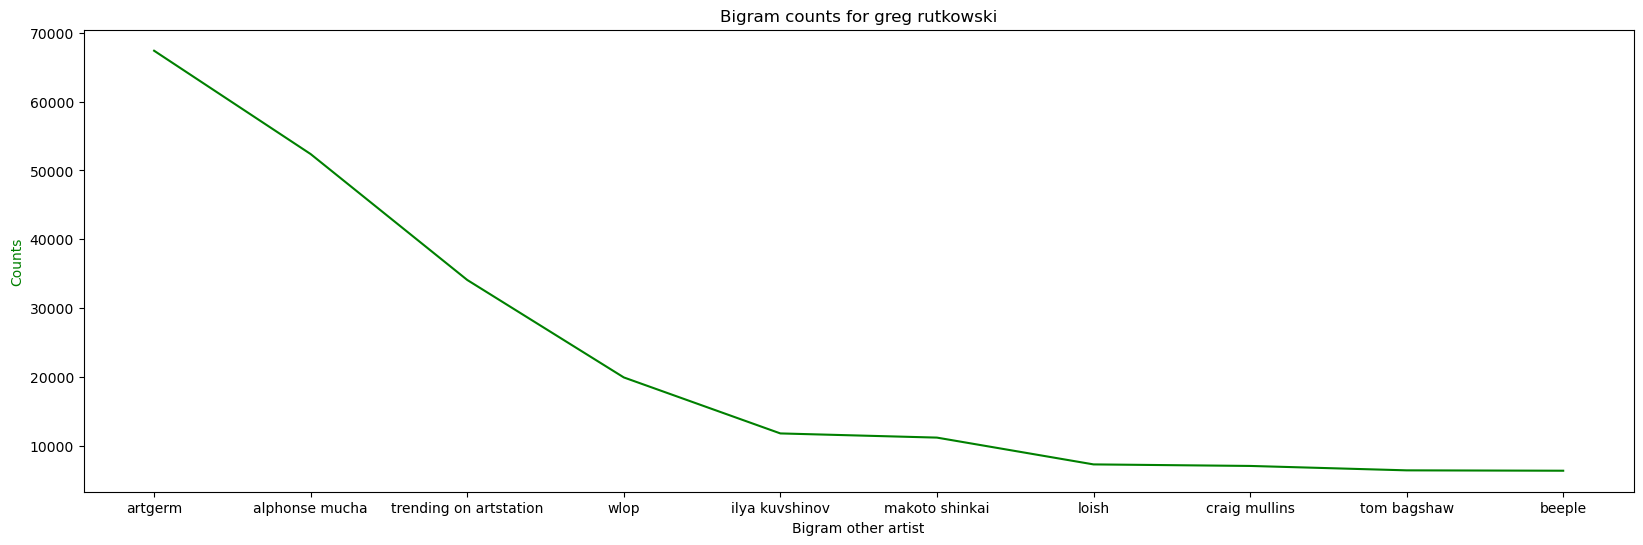

In [28]:
artist = "greg rutkowski"


filtered_df_bigrams = df_bigrams[df_bigrams['bigrams'].str.contains(artist)].copy()



top = 10

print(f'found {filtered_df_bigrams.shape[0]} distinct bigrams for {artist}')

print(f'top {top} most common bigrams for {artist}')
print(filtered_df_bigrams.head(top))

import matplotlib.pyplot as plt
x_data = []
y_data = []

c = 0
for index, row in filtered_df_bigrams.iterrows():
    if c==top:
        break
    c+=1
    x_data.append(row.bigrams.replace(artist, "").replace(",","").strip())
    y_data.append(row.counts)


fig, ax1 = plt.subplots(figsize=(20,6))
ax1.plot(x_data, y_data, 'g-')

ax1.set_xlabel('Bigram other artist')
ax1.set_ylabel('Counts', color='g')
ax1.set_title(f'Bigram counts for {artist}')

plt.show()